**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [155]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

#from math import isclose
from scipy import optimize
#from scipy.optimize import differential_evolution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [156]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [157]:
model = ExchangeEconomyClass()

In [158]:
par = model.par

uA_endowment=model.utility_A(par.w1A,par.w2A)
uB_endowment=model.utility_B(1-par.w1A,1-par.w2A)

N=75
xlist=[]

for x1A in np.linspace(0,1,N+1):
    for x2A in np.linspace(0,1,N+1):
        x1B = 1-x1A
        x2B = 1- x2A
        uA = model.utility_A(x1A,x2A)
        uB = model.utility_B(x1B,x2B)

        if uA >= uA_endowment and uB >= uB_endowment:
            xlist.append((x1A,x2A))

x_values, y_values = zip(*xlist)
#print(xlist)

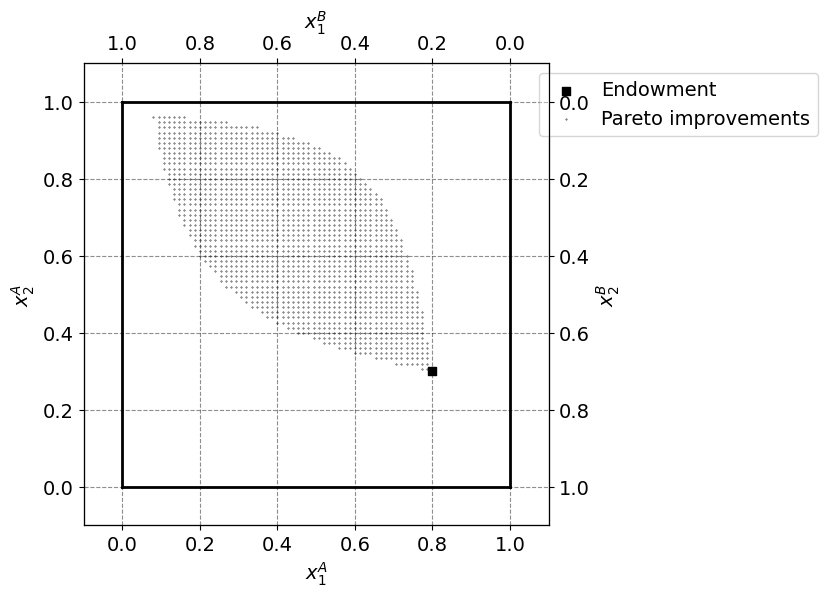

In [159]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')
ax_A.scatter(x_values,y_values,marker='o',color='black',s=0.1,label='Pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

In [160]:
#2

eps1best = np.inf
eps2best = np.inf
p1best = np.nan
for i, p1 in enumerate(np.linspace(0.5,2.5,N+1)):
    if i % 5 == 0:
        print(f'{i}: p1 = {p1:.3f} -> (eps1, eps2) = ({model.check_market_clearing(p1best)[0]:.3f}, {model.check_market_clearing(p1best)[1]:.3f})')
    if np.abs(model.check_market_clearing(p1)[0])<eps1best:
        eps1best = np.abs(model.check_market_clearing(p1)[0])
        eps2best = np.abs(model.check_market_clearing(p1)[1])
        p1best = p1

print(f'Market clearing price: p1 = {p1best:.3f} -> (eps1, eps2) = ({model.check_market_clearing(p1best)[0]:.3f}, {model.check_market_clearing(p1best)[1]:.3f})')

0: p1 = 0.500 -> (eps1, eps2) = (nan, nan)
5: p1 = 0.633 -> (eps1, eps2) = (0.334, -0.203)
10: p1 = 0.767 -> (eps1, eps2) = (0.166, -0.123)
15: p1 = 0.900 -> (eps1, eps2) = (0.049, -0.043)
20: p1 = 1.033 -> (eps1, eps2) = (-0.006, 0.005)
25: p1 = 1.167 -> (eps1, eps2) = (-0.006, 0.005)
30: p1 = 1.300 -> (eps1, eps2) = (-0.006, 0.005)
35: p1 = 1.433 -> (eps1, eps2) = (-0.006, 0.005)
40: p1 = 1.567 -> (eps1, eps2) = (-0.006, 0.005)
45: p1 = 1.700 -> (eps1, eps2) = (-0.006, 0.005)
50: p1 = 1.833 -> (eps1, eps2) = (-0.006, 0.005)
55: p1 = 1.967 -> (eps1, eps2) = (-0.006, 0.005)
60: p1 = 2.100 -> (eps1, eps2) = (-0.006, 0.005)
65: p1 = 2.233 -> (eps1, eps2) = (-0.006, 0.005)
70: p1 = 2.367 -> (eps1, eps2) = (-0.006, 0.005)
75: p1 = 2.500 -> (eps1, eps2) = (-0.006, 0.005)
Market clearing price: p1 = 0.953 -> (eps1, eps2) = (-0.006, 0.005)


In [161]:
#4
#Could consider adding constraints in the values of x1B and x2B, 
#since by def they cant be more than 1. It wont change results but could
#be cute
def uA(p1):
    return model.utility_A(1-model.demand_B(p1)[0],1-model.demand_B(p1)[1])

#4a
p1best = np.nan
uAbest = -np.inf
for i, p1 in enumerate(np.linspace(0.5,2.5,N+1)):
    if i % 5 ==0:
        print(f'{i}: p1 = {p1:.3f} -> (x1A,x2A) = ({1-model.demand_B(p1)[0]:.3f}, {1-model.demand_B(p1)[1]:.3f}) -> uA = {uA(p1):.3f}')
    if uA(p1)>uAbest:
        uAbest = uA(p1)
        p1best = p1

print(f'Best: p1 = {p1best:.5f} -> uA = {uAbest:.5f}')

0: p1 = 0.500 -> (x1A,x2A) = (-0.067, 0.733) -> uA = nan
5: p1 = 0.633 -> (x1A,x2A) = (0.130, 0.724) -> uA = 0.408
10: p1 = 0.767 -> (x1A,x2A) = (0.258, 0.716) -> uA = 0.509
15: p1 = 0.900 -> (x1A,x2A) = (0.348, 0.707) -> uA = 0.558
20: p1 = 1.033 -> (x1A,x2A) = (0.415, 0.698) -> uA = 0.587
25: p1 = 1.167 -> (x1A,x2A) = (0.467, 0.689) -> uA = 0.605
30: p1 = 1.300 -> (x1A,x2A) = (0.508, 0.680) -> uA = 0.617
35: p1 = 1.433 -> (x1A,x2A) = (0.541, 0.671) -> uA = 0.625
40: p1 = 1.567 -> (x1A,x2A) = (0.569, 0.662) -> uA = 0.629
45: p1 = 1.700 -> (x1A,x2A) = (0.592, 0.653) -> uA = 0.632
50: p1 = 1.833 -> (x1A,x2A) = (0.612, 0.644) -> uA = 0.633
55: p1 = 1.967 -> (x1A,x2A) = (0.629, 0.636) -> uA = 0.633
60: p1 = 2.100 -> (x1A,x2A) = (0.644, 0.627) -> uA = 0.633
65: p1 = 2.233 -> (x1A,x2A) = (0.658, 0.618) -> uA = 0.631
70: p1 = 2.367 -> (x1A,x2A) = (0.669, 0.609) -> uA = 0.628
75: p1 = 2.500 -> (x1A,x2A) = (0.680, 0.600) -> uA = 0.626
Best: p1 = 1.88667 -> uA = 0.63362


c:\Users\Bruger\OneDrive\Skrivebord\Pogramming\IntroProg-lectures\projects\ExchangeEconomy.py:21: RuntimeWarning: invalid value encountered in scalar power
  return x1A**self.par.alpha*x2A**(1-self.par.alpha)


In [162]:
#4b
#same here, could add constraints.
def uA(p1):
    return model.utility_A(1-model.demand_B(p1)[0],1-model.demand_B(p1)[1])

obj_func = lambda p1: -uA(p1)
res = optimize.minimize(obj_func,p1best,method="Nelder-Mead",
                        bounds=[(0,np.inf)])

print(f'Best: p1 = {res.x[0]:.8f} -> uA = {-res.fun:.8f}')

Best: p1 = 1.89937956 -> uA = 0.63362085


In [163]:
#5a

#we have xlist from earlier which is all points in C
uAmax_C = -np.inf
x1Amax_C= np.nan
x2Amax_C= np.nan

for x1A, x2A in xlist:
    if model.utility_A(x1A,x2A) > uAmax_C:
        uAmax_C = model.utility_A(x1A,x2A)
        x1Amax_C= x1A
        x2Amax_C= x2A

print(f'Max utility for A in C is {uAmax_C:.4f} at (x1,x2) = ({x1Amax_C:.4f}, {x2Amax_C:.4f})')
print(f'B gets uB = {model.utility_B(1-x1Amax_C,1-x2Amax_C):.4f}')


Max utility for A in C is 0.7416 at (x1,x2) = (0.5600, 0.8533)
B gets uB = 0.3051


In [164]:
#5b

constraints = ({'type':'ineq', 'fun': lambda x: model.utility_B(1-x[0],1-x[1]) - model.utility_B(1-model.par.w1A, 1-model.par.w2A)})
bounds = [(0,1),(0,1)]
initial_guess = [x1Amax_C, x2Amax_C]

res = optimize.minimize(
   lambda x: -model.utility_A(x[0],x[1]),initial_guess,
   method='SLSQP',bounds=bounds,constraints=constraints)

#print(res)

print(f'Max utility for A is uA = {-res.fun:.4f} at (x1,x2) = ({res.x[0]:.4f}, {res.x[1]:.4f})')
print(f'B gets uB = {model.utility_B(1-res.x[0],1-res.x[1]):.4f}')



Max utility for A is uA = 0.7432 at (x1,x2) = (0.5758, 0.8444)
B gets uB = 0.3037


In [165]:
#6a

bounds = [(0,1),(0,1)]
initial_guess = [0.5, 0.5]

res = optimize.minimize(
   lambda x: -model.utility_A(x[0],x[1])-model.utility_B(1-x[0],1-x[1]),initial_guess,
   method='Nelder-Mead',bounds=bounds)

print(f'(x1A,x2A) = ({res.x[0]:.4f}, {res.x[1]:.4f}) -> uA = {model.utility_A(res.x[0],res.x[1]):.4f}')
print(f'(x1B,x2B) = ({1-res.x[0]:.4f}, {1-res.x[1]:.4f}) -> uB = {model.utility_B(1- res.x[0],1- res.x[1]):.4f}')

(x1A,x2A) = (0.3333, 0.6667) -> uA = 0.5291
(x1B,x2B) = (0.6667, 0.3333) -> uB = 0.5291


In [166]:
#7
np.random.seed(4444)
N2 = 50

w1A=np.random.uniform(low=0,high=1,size=N2)
w2A=np.random.uniform(low=0,high=1,size=N2)

wlist = list(zip(w1A,w2A))

#print(wlist)

In [167]:
#8

initial_guess=1
bounds=[(0,np.inf)]

newxlist=[]
for w1A, w2A in wlist:
    res = optimize.minimize(
        lambda x: np.abs(model.marketclearnew(x,w1A,w2A)),initial_guess,
        method='Nelder-Mead',bounds=bounds
    )
    newxlist.append(tuple(map(float, model.newdemand_A(res.x[0],w1A,w2A))))
#print(newxlist)

newx1list, newx2list = zip(*newxlist)

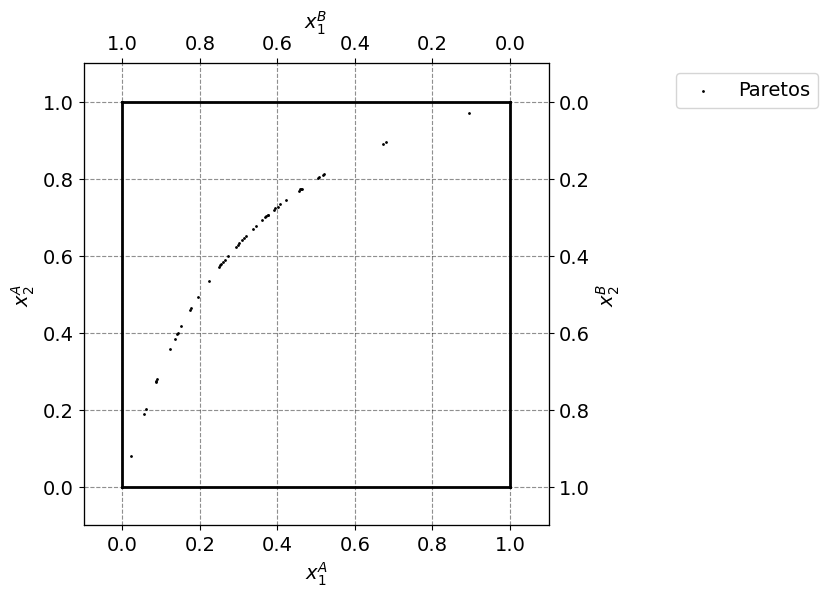

In [168]:
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
#ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')
ax_A.scatter(newx1list,newx2list,marker='o',color='black',s=1,label='Paretos')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));